In [1]:
import pandas as pd
import matplotlib.pyplot as plt
infile="/Users/irffanalahi/Research/Research_code/gitignorefolder/DMRrelated/diagnosis/genomic_feature_allwithheader/PBLtilMel_meldiff-.7_other-.1_q0.00001_sorted4_1_genomic_feature_intron_exon_segregated_celltypeseperated/MEL_TUMOR/promdataready_all_matrixCin_nr0.5_imputed_g1_MEL_TUMOR_3_g2_others_15.txt_q0.01_diff0.7_hypo.txt_exon_genecode_v36_modified.txt_canonical.txt_proteinCodingGene.txt.txt"

indf=pd.read_csv(infile,sep="\t")

diffcol='Mel_Tumor-others'


diffrange=[.1,.3,.5,.7,.9]


indf.head()

,chrom,start,end,q,Mel_Tumor-others,#cpg,p(MWU),p(2dks),Mel_Tumor,Others,...,#hg38.knownCanonical.chrom_x,hg38.knownCanonical.chromStart_x,hg38.knownCanonical.chromEnd_x,hg38.knownCanonical.transcript,transcriptno,direction,#hg38.knownCanonical.chrom_y,hg38.knownCanonical.chromStart_y,hg38.knownCanonical.chromEnd_y,hg38.kgXref.geneSymbol
0,chr6,116557987,116558060,1.050000e-08,-0.875465,5,1.130000e-09,1.560000e-10,0.027067,0.90253,...,chr6,116557824,116558575,ENST00000368596.3,1,+,chr6,116553749,116558575,CALHM4
1,chr16,88533427,88533891,0.000000e+00,-0.861474,70,4.840000e-14,2.840000e-99,0.027260,0.88873,...,chr16,88533147,88537031,ENST00000319555.8,9,+,chr16,88453279,88537031,ZFPM1
2,chr17,63681549,63681900,2.840000e-13,-0.857708,8,5.360000e-14,2.170000e-15,0.030958,0.88867,...,chr17,63681765,63681899,ENST00000577395.5,6,+,chr17,63622709,63693874,MAP3K3
3,chr8,31087378,31087802,3.180000e-13,-0.855212,8,5.360000e-14,2.450000e-15,0.067958,0.92317,...,chr8,31087775,31087920,ENST00000298139.7,11,+,chr8,31033809,31176138,WRN
4,chr6,158707205,158707330,1.440000e-08,-0.851735,5,1.130000e-09,2.180000e-10,0.060400,0.91214,...,chr6,158707229,158707281,ENST00000611299.4,6,+,chr6,158650013,158764876,SYTL3


In [2]:
set(indf['direction'].tolist())

{'+', '-'}

In [3]:
indfposdirection=indf[indf['direction']=='+']
indfnegdirection=indf[indf['direction']=='-']

In [4]:
#indfposdirection['transcriptno'].plot.kde()

In [5]:
indfposdirection.shape

(112, 26)

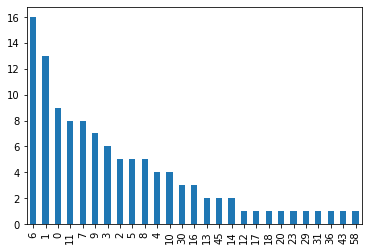

In [6]:
fig, ax = plt.subplots()
indfposdirection['transcriptno'].value_counts().plot(ax=ax, kind='bar')